In [ ]:
import numpy as np
import pandas
import matplotlib.pyplot as plt

def entries_histogram(turnstile_weather):
    '''
    Before we perform any analysis, it might be useful to take a
    look at the data we're hoping to analyze. More specifically, let's 
    examine the hourly entries in our NYC subway data and determine what
    distribution the data follows. This data is stored in a dataframe
    called turnstile_weather under the ['ENTRIESn_hourly'] column.
    
    Let's plot two histograms on the same axes to show hourly
    entries when raining vs. when not raining. Here's an example on how
    to plot histograms with pandas and matplotlib:
    turnstile_weather['column_to_graph'].hist()
    
    Your histogram may look similar to bar graph in the instructor notes below.
    
    You can read a bit about using matplotlib and pandas to plot histograms here:
    http://pandas.pydata.org/pandas-docs/stable/visualization.html#histograms
    
    You can see the information contained within the turnstile weather data here:
    https://www.dropbox.com/s/meyki2wl9xfa7yk/turnstile_data_master_with_weather.csv
    '''
    
    plt.figure()
    turnstile_weather[turnstile_weather["rain"] ==1]['ENTRIESn_hourly'].hist()
    turnstile_weather[turnstile_weather["rain"] ==0]['ENTRIESn_hourly'].hist() # your code here to plot a historgram for hourly entries when it is not raining
    return plt


In [12]:
import os

os.getcwd()

'/Users/thuy/Documents/Data-Science/P2_Wrangling_Subway_Data'

In [15]:
ls

P2_Wrangling_Subway_Data/                   baseball_stats.csv
Problem set 3.ipynb                         lesson01.ipynb
Quizs                                       lesson3_Data_analysis.ipynb
README.md                                   loading_wrangling_data_lesson02.ipynb
Untitled0.ipynb                             turnstile_data_master_with_weather (1).csv


In [13]:
#change directory
os.chdir('/Users/thuy/Documents/Data-Science/')

In [19]:
turnstile_weather = pd.read_csv("turnstile_data_master_with_weather (1).csv")

In [20]:
turnstile_weather.head()

,Unnamed: 0,UNIT,DATEn,TIMEn,Hour,DESCn,ENTRIESn_hourly,EXITSn_hourly,maxpressurei,maxdewpti,...,meandewpti,meanpressurei,fog,rain,meanwindspdi,mintempi,meantempi,maxtempi,precipi,thunder
0,0,R001,2011-05-01,01:00:00,1,REGULAR,0,0,30.31,42,...,39,30.27,0,0,5,50,60,69,0,0
1,1,R001,2011-05-01,05:00:00,5,REGULAR,217,553,30.31,42,...,39,30.27,0,0,5,50,60,69,0,0
2,2,R001,2011-05-01,09:00:00,9,REGULAR,890,1262,30.31,42,...,39,30.27,0,0,5,50,60,69,0,0
3,3,R001,2011-05-01,13:00:00,13,REGULAR,2451,3708,30.31,42,...,39,30.27,0,0,5,50,60,69,0,0
4,4,R001,2011-05-01,17:00:00,17,REGULAR,4400,2501,30.31,42,...,39,30.27,0,0,5,50,60,69,0,0


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats

def entries_histogram(turnstile_weather):
    plt.figure()
    turnstile.weather['EXITSn_hourly' & 'rain' ==1].hist()



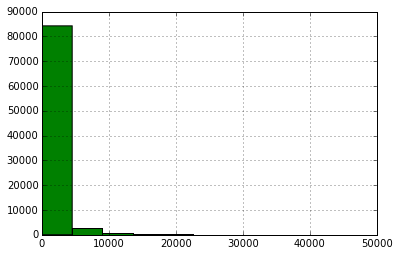

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats
turnstile_weather[turnstile_weather["rain"] ==1]['EXITSn_hourly'].hist()
turnstile_weather[turnstile_weather["rain"] ==0]['EXITSn_hourly'].hist()


The data is not normally distributed. Therefore, we cannot use t-test.

In [53]:
import numpy as np
import scipy
import scipy.stats
import pandas

def mann_whitney_plus_means(turnstile_weather):
    '''
    This function will consume the turnstile_weather dataframe containing
    our final turnstile weather data. 
    
    You will want to take the means and run the Mann Whitney U-test on the 
    ENTRIESn_hourly column in the turnstile_weather dataframe.
    
    This function should return:
        1) the mean of entries with rain
        2) the mean of entries without rain
        3) the Mann-Whitney U-statistic and p-value comparing the number of entries
           with rain and the number of entries without rain
    
    You should feel free to use scipy's Mann-Whitney implementation, and you 
    might also find it useful to use numpy's mean function.
    
    Here are the functions' documentation:
    http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html
    http://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html
    
    You can look at the final turnstile weather data at the link below:
    https://www.dropbox.com/s/meyki2wl9xfa7yk/turnstile_data_master_with_weather.csv
    '''
    
    ### YOUR CODE HERE ###
    with_rain_mean = turnstile_weather[turnstile_weather["rain"] ==1]['ENTRIESn_hourly'].mean()
    without_rain_mean = turnstile_weather[turnstile_weather["rain"] ==0]['ENTRIESn_hourly'].mean()
    U,p = scipy.stats.mannwhitneyu(turnstile_weather[turnstile_weather["rain"] ==1]['ENTRIESn_hourly'], turnstile_weather[turnstile_weather["rain"] ==0]['ENTRIESn_hourly'])
    return with_rain_mean, without_rain_mean, U, p # leave this line for the grader


In [56]:
#mean of entries with and without rain
with_rain_mean = turnstile_weather[turnstile_weather["rain"] ==1]['ENTRIESn_hourly'].mean()
without_rain_mean = turnstile_weather[turnstile_weather["rain"] ==0]['ENTRIESn_hourly'].mean()

In [57]:
# the Mann-Whitney U-statistic and p-value
list1 = turnstile_weather[turnstile_weather["rain"] ==1]['ENTRIESn_hourly']
list2 = turnstile_weather[turnstile_weather["rain"] ==0]['ENTRIESn_hourly']
U,p = scipy.stats.mannwhitneyu(list1, list2)

In [59]:
with_rain_mean, without_rain_mean, (U,p)

(1105.4463767458733, 1090.278780151855, (1924409167.0, 0.024999912793489721))

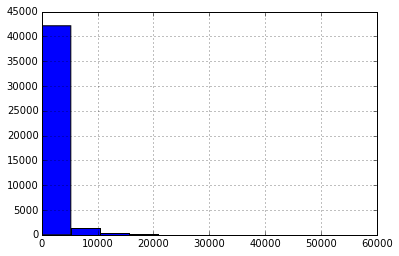

In [54]:
#Distribution of number entries on day with rain
plt.figure()
turnstile_weather[turnstile_weather["rain"] ==1]['ENTRIESn_hourly'].hist()

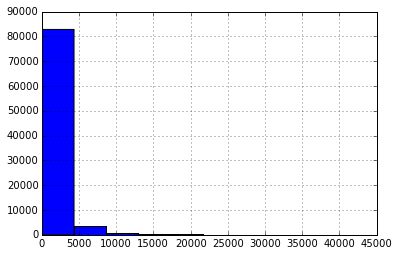

In [55]:
#Distribution of number entries on day with rain
plt.figure()
turnstile_weather[turnstile_weather["rain"] ==0]['ENTRIESn_hourly'].hist()

#### Interprete the p value:
p < 0.05. Therefore, we can reject the null hypothesis that the difference is due to random sampling, and conclude instead that the populations are distinct.

In [98]:
import numpy as np
import pandas
import statsmodels.api as sm

"""
In this question, you need to:
1) implement the linear_regression() procedure
2) Select features (in the predictions procedure) and make predictions.

"""

def linear_regression(features, values):
    """
    Perform linear regression given a data set with an arbitrary number of features.
    
    This can be the same code as in the lesson #3 exercise.
    """
    model = sm.OLS(values, sm.add_constant(features))
    results = model.fit()
    intercept = results.params[0]
    params = results.params[1:]
    return intercept, params
    ###########################
    ### YOUR CODE GOES HERE ###
    ###########################
    
    return intercept, params

def predictions(dataframe):
    '''
    The NYC turnstile data is stored in a pandas dataframe called weather_turnstile.
    Using the information stored in the dataframe, let's predict the ridership of
    the NYC subway using linear regression with gradient descent.
    
    You can download the complete turnstile weather dataframe here:
    https://www.dropbox.com/s/meyki2wl9xfa7yk/turnstile_data_master_with_weather.csv    
    
    Your prediction should have a R^2 value of 0.40 or better.
    You need to experiment using various input features contained in the dataframe. 
    We recommend that you don't use the EXITSn_hourly feature as an input to the 
    linear model because we cannot use it as a predictor: we cannot use exits 
    counts as a way to predict entry counts. 
    
    Note: Due to the memory and CPU limitation of our Amazon EC2 instance, we will
    give you a random subet (~10%) of the data contained in 
    turnstile_data_master_with_weather.csv. You are encouraged to experiment with 
    this exercise on your own computer, locally. If you do, you may want to complete Exercise
    8 using gradient descent, or limit your number of features to 10 or so, since ordinary
    least squares can be very slow for a large number of features.
    
    If you receive a "server has encountered an error" message, that means you are 
    hitting the 30-second limit that's placed on running your program. Try using a
    smaller number of features.
    '''
    ################################ MODIFY THIS SECTION #####################################
    # Select features. You should modify this section to try different features!             #
    # We've selected rain, precipi, Hour, meantempi, and UNIT (as a dummy) to start you off. #
    # See this page for more info about dummy variables:                                     #
    # http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html          #
    ##########################################################################################
    features = dataframe[['rain', 'precipi', 'Hour', 'meantempi']]
    dummy_units = pandas.get_dummies(dataframe['UNIT'], prefix='unit')
    features = features.join(dummy_units)
    
    # Values
    values = dataframe['ENTRIESn_hourly']

    # Perform linear regression
    intercept, params = linear_regression(features, values)
    
    predictions = intercept + np.dot(features, params)
    return predictions

In [99]:
dummy_units = pandas.get_dummies(turnstile_weather['UNIT'], prefix ='unit')

In [100]:
dummy_units.head()

,unit_R001,unit_R002,unit_R003,unit_R004,unit_R005,unit_R006,unit_R007,unit_R008,unit_R009,unit_R010,...,unit_R543,unit_R544,unit_R545,unit_R546,unit_R547,unit_R548,unit_R549,unit_R550,unit_R551,unit_R552
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
features = turnstile_weather[['rain', 'precipi', 'Hour', 'meantempi']]
features.head()

,rain,precipi,Hour,meantempi
0,0,0,1,60
1,0,0,5,60
2,0,0,9,60
3,0,0,13,60
4,0,0,17,60


In [102]:
features = features.join(dummy_units)
features.head()

,rain,precipi,Hour,meantempi,unit_R001,unit_R002,unit_R003,unit_R004,unit_R005,unit_R006,...,unit_R543,unit_R544,unit_R545,unit_R546,unit_R547,unit_R548,unit_R549,unit_R550,unit_R551,unit_R552
0,0,0,1,60,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,5,60,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,9,60,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,13,60,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,17,60,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
values = turnstile_weather['ENTRIESn_hourly']

In [104]:
intercept, params = linear_regression(features, values)
    
predictions = intercept + np.dot(features, params)

In [105]:
predictions

array([ 3380.27814731,  3649.86457235,  3919.45099739, ...,   856.45041206,
         856.45041206,   856.45041206])

In [73]:
len(predictions)

131951

In [74]:
import numpy as np

def compute_r_squared(data, predictions):
    # Write a function that, given two input numpy arrays, 'data', and 'predictions,'
    # returns the coefficient of determination, R^2, for the model that produced 
    # predictions.
    # 
    # Numpy has a couple of functions -- np.mean() and np.sum() --
    # that you might find useful, but you don't have to use them.

    # YOUR CODE GOES HERE
    difference_squared = map(lambda data, predictions: (data - predictions)**2, data, predictions)
    mean_data = np.mean(data)
    variance = map(lambda data: (data - mean_data)**2, data)
    r_squared = 1 - sum(difference_squared)/sum(variance)

    return r_squared

In [75]:
data = turnstile_weather['ENTRIESn_hourly']
compute_r_squared(data, predictions)

0.45804446474052984

In [76]:
list(turnstile_weather.columns.values)

['Unnamed: 0',
 'UNIT',
 'DATEn',
 'TIMEn',
 'Hour',
 'DESCn',
 'ENTRIESn_hourly',
 'EXITSn_hourly',
 'maxpressurei',
 'maxdewpti',
 'mindewpti',
 'minpressurei',
 'meandewpti',
 'meanpressurei',
 'fog',
 'rain',
 'meanwindspdi',
 'mintempi',
 'meantempi',
 'maxtempi',
 'precipi',
 'thunder']

In [77]:
features_1 = turnstile_weather[['rain', 'precipi', 'Hour', 'meantempi', 'TIMEn', 'fog', 'thunder']]


In [90]:
import numpy as np
import pandas
import statsmodels.api as sm

"""
In this question, you need to:
1) implement the linear_regression() procedure
2) Select features (in the predictions procedure) and make predictions.

"""

def linear_regression(features, values):
    """
    Perform linear regression given a data set with an arbitrary number of features.
    
    This can be the same code as in the lesson #3 exercise.
    """
    model = sm.OLS(values, sm.add_constant(features))
    results = model.fit()
    intercept = results.params[0]
    params = results.params[1:]
    return intercept, params
    ###########################
    ### YOUR CODE GOES HERE ###
    ###########################

def predictions_morefeatures(dataframe):
    '''
    The NYC turnstile data is stored in a pandas dataframe called weather_turnstile.
    Using the information stored in the dataframe, let's predict the ridership of
    the NYC subway using linear regression with gradient descent.
    
    You can download the complete turnstile weather dataframe here:
    https://www.dropbox.com/s/meyki2wl9xfa7yk/turnstile_data_master_with_weather.csv    
    
    Your prediction should have a R^2 value of 0.40 or better.
    You need to experiment using various input features contained in the dataframe. 
    We recommend that you don't use the EXITSn_hourly feature as an input to the 
    linear model because we cannot use it as a predictor: we cannot use exits 
    counts as a way to predict entry counts. 
    
    Note: Due to the memory and CPU limitation of our Amazon EC2 instance, we will
    give you a random subet (~10%) of the data contained in 
    turnstile_data_master_with_weather.csv. You are encouraged to experiment with 
    this exercise on your own computer, locally. If you do, you may want to complete Exercise
    8 using gradient descent, or limit your number of features to 10 or so, since ordinary
    least squares can be very slow for a large number of features.
    
    If you receive a "server has encountered an error" message, that means you are 
    hitting the 30-second limit that's placed on running your program. Try using a
    smaller number of features.
    '''
    ################################ MODIFY THIS SECTION #####################################
    # Select features. You should modify this section to try different features!             #
    # We've selected rain, precipi, Hour, meantempi, and UNIT (as a dummy) to start you off. #
    # See this page for more info about dummy variables:                                     #
    # http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html          #
    ##########################################################################################
    features = dataframe[['rain', 'precipi', 'Hour', 'meantempi', 'TIMEn']]
    dummy_units = pandas.get_dummies(dataframe['UNIT'], prefix='unit')
    features = features.join(dummy_units)
    
    # Values
    values = dataframe['ENTRIESn_hourly']

    # Perform linear regression
    intercept, params = linear_regression(features, values)
    
    predictions = intercept + np.dot(features, params)
    return predictions

In [91]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

def plot_residuals(turnstile_weather, predictions):
    '''
    Using the same methods that we used to plot a histogram of entries
    per hour for our data, why don't you make a histogram of the residuals
    (that is, the difference between the original hourly entry data and the predicted values).
    Try different binwidths for your histogram.

    Based on this residual histogram, do you have any insight into how our model
    performed?  Reading a bit on this webpage might be useful:

    http://www.itl.nist.gov/div898/handbook/pri/section2/pri24.htm
    '''
    
    plt.figure()
    (turnstile_weather['ENTRIESn_hourly'] - predictions).hist()
    return plt

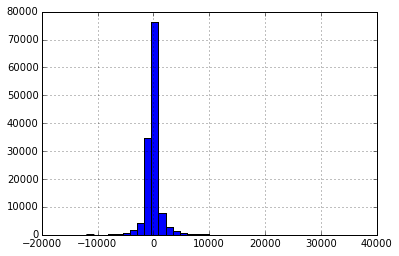

In [121]:
plt.figure()
data = (turnstile_weather['ENTRIESn_hourly'] - predictions)
data.hist(bins = 40)

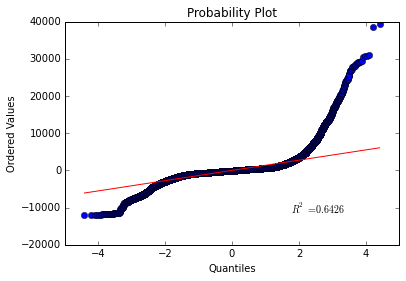

In [122]:
#Test to see residual is normally distributed using q-q plots
import pylab  
stats.probplot(data, dist="norm", plot=pylab) 
pylab.show()

The residual model is not normally distributed. We need to improve the predictions.

In [ ]:
# Linear regression using gradient descent
>>> import numpy as np
>>> from sklearn import linear_model
>>> n_samples, n_features = 10, 5
>>> np.random.seed(0)
>>> y = np.random.randn(n_samples)
>>> X = np.random.randn(n_samples, n_features)
>>> clf = linear_model.SGDRegressor()
>>> clf.fit(X, y)
... 
SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
             fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
             loss='squared_loss', n_iter=5, penalty='l2', power_t=0.25,
             random_state=None, shuffle=True, verbose=0, warm_start=False)

In [123]:
from sklearn import linear_model
n_samples, n_features = 10, 5
np.random.seed(0)

In [124]:
y = np.random.randn(n_samples)
y

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ])

In [125]:
X = np.random.randn(n_samples, n_features)

In [126]:
X

array([[ 0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323],
       [ 0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574],
       [-2.55298982,  0.6536186 ,  0.8644362 , -0.74216502,  2.26975462],
       [-1.45436567,  0.04575852, -0.18718385,  1.53277921,  1.46935877],
       [ 0.15494743,  0.37816252, -0.88778575, -1.98079647, -0.34791215],
       [ 0.15634897,  1.23029068,  1.20237985, -0.38732682, -0.30230275],
       [-1.04855297, -1.42001794, -1.70627019,  1.9507754 , -0.50965218],
       [-0.4380743 , -1.25279536,  0.77749036, -1.61389785, -0.21274028],
       [-0.89546656,  0.3869025 , -0.51080514, -1.18063218, -0.02818223],
       [ 0.42833187,  0.06651722,  0.3024719 , -0.63432209, -0.36274117]])

In [138]:
clf = linear_model.SGDRegressor()
print clf.fit(X,y).intercept_
print clf.fit(X,y).coef_
clf.fit(X,y).decision_function(X)

[ 0.15013953]
[-0.113073    0.04920122 -0.06321251  0.03607769  0.10033739]


array([ 0.20063447,  0.12953062,  0.5915513 ,  0.51578424,  0.11541454,
        0.07160303,  0.33250122,  0.01826932,  0.26027338,  0.03559788])

In [139]:
import numpy as np
import pandas
from sklearn.linear_model import SGDRegressor

"""
In this question, you need to:
1) Implement the linear_regression() procedure using gradient descent.
   You can use the SGDRegressor class from sklearn, since this class uses gradient descent.
2) Select features (in the predictions procedure) and make predictions.

"""

def normalize_features(features):
    ''' 
    Returns the means and standard deviations of the given features, along with a normalized feature
    matrix.
    ''' 
    means = np.mean(features, axis=0)
    std_devs = np.std(features, axis=0)
    normalized_features = (features - means) / std_devs
    return means, std_devs, normalized_features

def recover_params(means, std_devs, norm_intercept, norm_params):
    ''' 
    Recovers the weights for a linear model given parameters that were fitted using
    normalized features. Takes the means and standard deviations of the original
    features, along with the intercept and parameters computed using the normalized
    features, and returns the intercept and parameters that correspond to the original
    features.
    ''' 
    intercept = norm_intercept - np.sum(means * norm_params / std_devs)
    params = norm_params / std_devs
    return intercept, params

def linear_regression(features, values):
    """
    Perform linear regression given a data set with an arbitrary number of features.
    """
    
    ###########################
    ### YOUR CODE GOES HERE ###
    ###########################
    clf = SGDRegressor(n_iter = 10) # change the iteration number to make r^2 better
    intercept = clf.fit(features,values).intercept_
    params = clf.fit(features,values).coef_
    return intercept, params

def predictions(dataframe):
    '''
    The NYC turnstile data is stored in a pandas dataframe called weather_turnstile.
    Using the information stored in the dataframe, let's predict the ridership of
    the NYC subway using linear regression with gradient descent.
    
    You can download the complete turnstile weather dataframe here:
    https://www.dropbox.com/s/meyki2wl9xfa7yk/turnstile_data_master_with_weather.csv    
    
    Your prediction should have a R^2 value of 0.40 or better.
    You need to experiment using various input features contained in the dataframe. 
    We recommend that you don't use the EXITSn_hourly feature as an input to the 
    linear model because we cannot use it as a predictor: we cannot use exits 
    counts as a way to predict entry counts. 
    
    Note: Due to the memory and CPU limitation of our Amazon EC2 instance, we will
    give you a random subset (~50%) of the data contained in 
    turnstile_data_master_with_weather.csv. You are encouraged to experiment with 
    this exercise on your own computer, locally.
    
    If you receive a "server has encountered an error" message, that means you are 
    hitting the 30-second limit that's placed on running your program. Try using a
    smaller number of features or fewer iterations.
    '''
    ################################ MODIFY THIS SECTION #####################################
    # Select features. You should modify this section to try different features!             #
    # We've selected rain, precipi, Hour, meantempi, and UNIT (as a dummy) to start you off. #
    # See this page for more info about dummy variables:                                     #
    # http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html          #
    ##########################################################################################
    features = dataframe[['rain', 'precipi', 'Hour', 'meantempi']]
    dummy_units = pandas.get_dummies(dataframe['UNIT'], prefix='unit')
    features = features.join(dummy_units)
    
    # Values
    values = dataframe['ENTRIESn_hourly']
    
    # Get numpy arrays
    features_array = features.values
    values_array = values.values
    
    means, std_devs, normalized_features_array = normalize_features(features_array)

    # Perform gradient descent
    norm_intercept, norm_params = linear_regression(normalized_features_array, values_array)
    
    intercept, params = recover_params(means, std_devs, norm_intercept, norm_params)
    
    predictions = intercept + np.dot(features_array, params)
    # The following line would be equivalent:
    # predictions = norm_intercept + np.dot(normalized_features_array, norm_params)
    
    return predictions

In [141]:
list(turnstile_weather.columns.values)


['Unnamed: 0',
 'UNIT',
 'DATEn',
 'TIMEn',
 'Hour',
 'DESCn',
 'ENTRIESn_hourly',
 'EXITSn_hourly',
 'maxpressurei',
 'maxdewpti',
 'mindewpti',
 'minpressurei',
 'meandewpti',
 'meanpressurei',
 'fog',
 'rain',
 'meanwindspdi',
 'mintempi',
 'meantempi',
 'maxtempi',
 'precipi',
 'thunder']